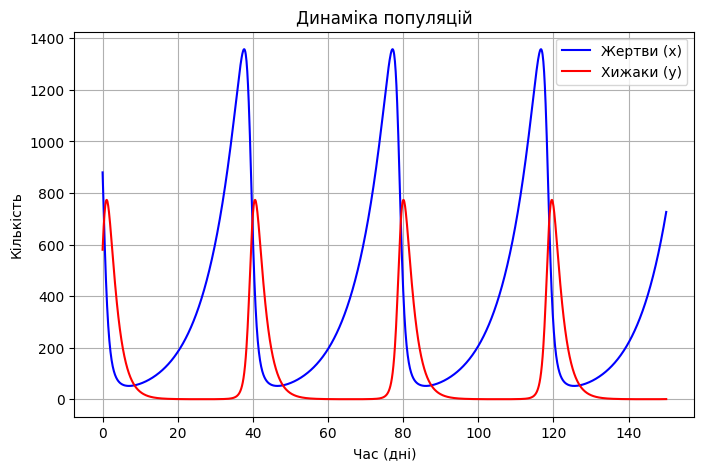

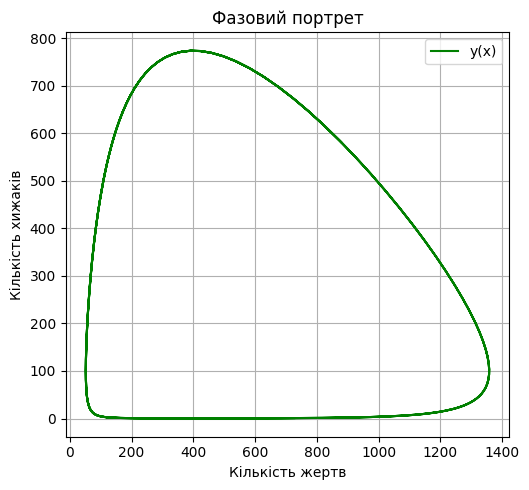

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 12 

a11 = 0.01 * N
a12 = 0.0001 * N
a21 = 0.0001 * N
a22 = 0.04 * N

x0 = 1000 - 10 * N
y0 = 700 - 10 * N

t0 = 0
h = 0.1
T = 150

def lotka_volterra(t, x, y):
    dxdt = a11 * x - a12 * x * y
    dydt = a21 * x * y - a22 * y
    return np.array([dxdt, dydt])

def runge_kutta_4(f, x0, y0, t0, T, h):
    t_values = np.arange(t0, T + h, h)
    x_values = np.zeros(len(t_values))
    y_values = np.zeros(len(t_values))
    
    x_values[0] = x0
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        x, y = x_values[i - 1], y_values[i - 1]
        
        k1 = h * f(t, x, y)
        k2 = h * f(t + h / 2, x + k1[0] / 2, y + k1[1] / 2)
        k3 = h * f(t + h / 2, x + k2[0] / 2, y + k2[1] / 2)
        k4 = h * f(t + h, x + k3[0], y + k3[1])
        
        x_values[i] = x + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
        y_values[i] = y + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6
    
    return t_values, x_values, y_values

t_values, x_values, y_values = runge_kutta_4(lotka_volterra, x0, y0, t0, T, h)

plt.figure(figsize=(8, 5))

plt.plot(t_values, x_values, label='Жертви (x)', color='b')
plt.plot(t_values, y_values, label='Хижаки (y)', color='r')
plt.xlabel('Час (дні)')
plt.ylabel('Кількість')
plt.title('Динаміка популяцій')
plt.legend()
plt.grid()

plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 2)
plt.plot(x_values, y_values, label='y(x)', color='g')
plt.xlabel('Кількість жертв')
plt.ylabel('Кількість хижаків')
plt.title('Фазовий портрет')
plt.legend()
plt.grid()

plt.tight_layout()  
plt.show()

plt.show()


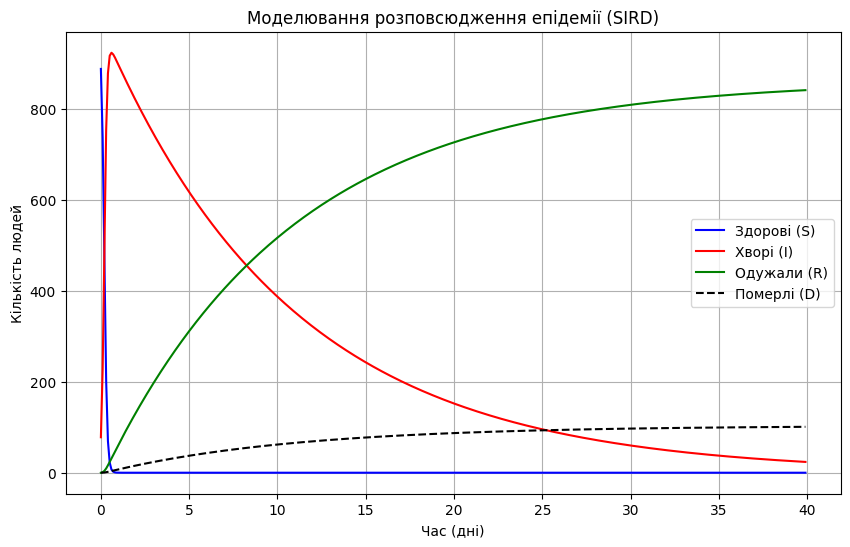

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def epidemic_system(t, state, beta, gamma, mu, H):
    S, I, R, D = state
    dSdt = -beta / H * S * I
    dIdt = beta / H * S * I - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return np.array([dSdt, dIdt, dRdt, dDdt])

def runge_kutta_4(f, t0, T, h, initial_conditions, beta, gamma, mu, H):
    t_values = np.arange(t0, T, h)
    num_steps = len(t_values)
    
    state_values = np.zeros((num_steps, 4))
    state_values[0] = initial_conditions
    
    for i in range(1, num_steps):
        t = t_values[i-1]
        state = state_values[i-1]
        
        k1 = f(t, state, beta, gamma, mu, H) * h
        k2 = f(t + 0.5 * h, state + 0.5 * k1, beta, gamma, mu, H) * h
        k3 = f(t + 0.5 * h, state + 0.5 * k2, beta, gamma, mu, H) * h
        k4 = f(t + h, state + k3, beta, gamma, mu, H) * h
        
        state_values[i] = state_values[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t_values, state_values

N = 12  
H = 1000 - N
beta = 25 - N
gamma = 1 / N  
mu = 0.01  

S0 = 900 - N  
I0 = 90 - N   
R0 = 0        
D0 = 0       
initial_conditions = np.array([S0, I0, R0, D0])

t0 = 0
T = 40
h = 0.1

t_values, state_values = runge_kutta_4(epidemic_system, t0, T, h, initial_conditions, beta, gamma, mu, H)

S_values, I_values, R_values, D_values = state_values[:, 0], state_values[:, 1], state_values[:, 2], state_values[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(t_values, S_values, label='Здорові (S)', color='blue')
plt.plot(t_values, I_values, label='Хворі (I)', color='red')
plt.plot(t_values, R_values, label='Одужали (R)', color='green')
plt.plot(t_values, D_values, label='Померлі (D)', color='black', linestyle='dashed')
plt.title("Моделювання розповсюдження епідемії (SIRD)")
plt.xlabel("Час (дні)")
plt.ylabel("Кількість людей")
plt.legend()
plt.grid(True)
plt.show()


## Що хтось обов'язково помре

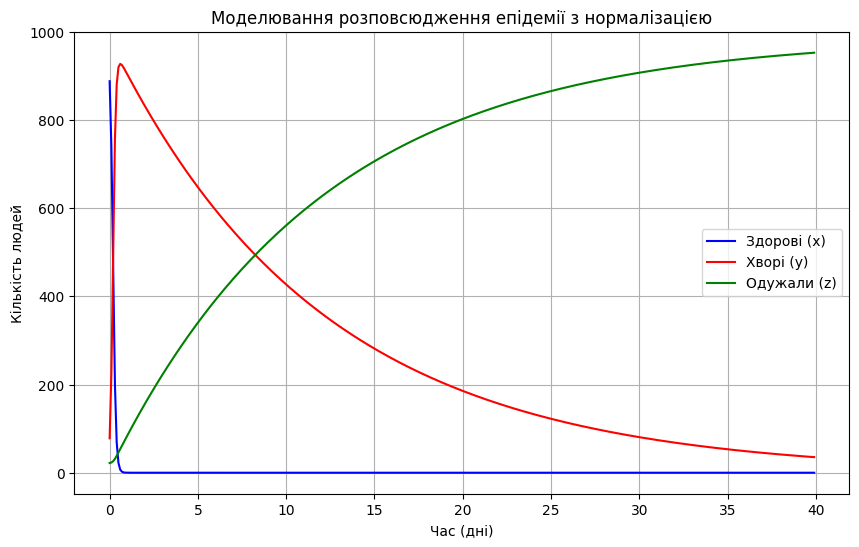

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def epidemic_system(t, state, beta, gamma, H):
    x, y, z = state
    dxdt = -beta / H * x * y
    dydt = beta / H * x * y - (1 / gamma) * y
    dzdt = (1 / gamma) * y
    return np.array([dxdt, dydt, dzdt])

def runge_kutta_4(f, t0, T, h, initial_conditions, beta, gamma, H):
    t_values = np.arange(t0, T, h)
    num_steps = len(t_values)
    
    state_values = np.zeros((num_steps, 3))
    state_values[0] = initial_conditions
    
    for i in range(1, num_steps):
        t = t_values[i-1]
        state = state_values[i-1]
        
        k1 = f(t, state, beta, gamma, H) * h
        k2 = f(t + 0.5 * h, state + 0.5 * k1, beta, gamma, H) * h
        k3 = f(t + 0.5 * h, state + 0.5 * k2, beta, gamma, H) * h
        k4 = f(t + h, state + k3, beta, gamma, H) * h
        
        state_values[i] = state_values[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t_values, state_values

N = 12  
H = 1000 - N
beta = 25 - N
gamma = N

x0 = 900 - N
y0 = 90 - N
z0 = H - x0 - y0
initial_conditions = np.array([x0, y0, z0])

t0 = 0
T = 40
h = 0.1

t_values, state_values = runge_kutta_4(epidemic_system, t0, T, h, initial_conditions, beta, gamma, H)

x_values, y_values, z_values = state_values[:, 0], state_values[:, 1], state_values[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='Здорові (x)', color='blue')
plt.plot(t_values, y_values, label='Хворі (y)', color='red')
plt.plot(t_values, z_values, label='Одужали (z)', color='green')
plt.title("Моделювання розповсюдження епідемії з нормалізацією")
plt.xlabel("Час (дні)")
plt.ylabel("Кількість людей")
plt.legend()
plt.grid(True)
plt.show()